### __1. Используя встроенные функции numpy (np.random.normal) сгенирируйте нормальное распределение c размерами выборки 10, 100, 1000 и 10000. Постройте гистограммы распределений. Рассчитайте среднее значение, медиану и моду для каждой выборке и сравните эти величины в пределах выборки.__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
def stat_characteristics(df):
    '''
    Функция принимает в качестве аргумента DataFrame, для каждого столбца которого будет подчитаны следующие
    статистические характеристики: "среднее значение", "мода", "медиана"
    Возвращает DataFrame содержащий статистические характеристики.    
    '''
    names_columns = ["среднее значение",
                     "мода",
                     "медиана"                     
                    ]
    
    df_dist = {'статистические параметры':names_columns}
    def stat(df_column):
        return [
            df_column.mean(),
            df_column.mode()[0] if len(df_column) != len(df_column.mode()) else None ,
            df_column.median()
        ]
        
    for current_name_column in df.columns.tolist():        
        df_dist[current_name_column] = stat(df[current_name_column])
    
    return pd.DataFrame(df_dist) 

def round_user(list_):
    '''
    функция ограничевает каждое число массива list_ тремя знаками после запитой
    '''
    return list(map(lambda x:round(x,3),list_))



#### Построим гистограммы распределений

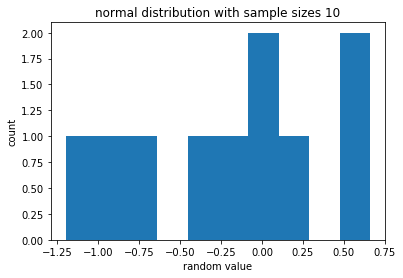

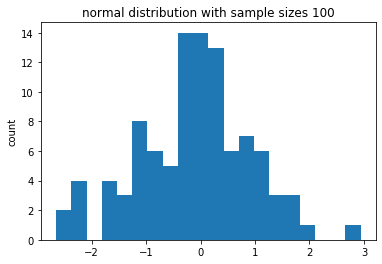

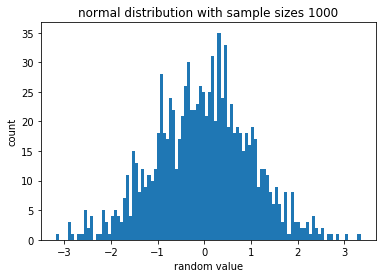

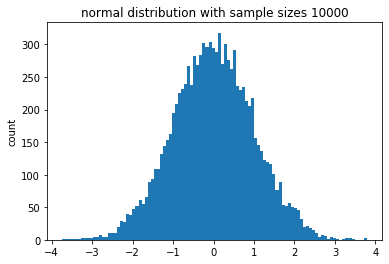

In [154]:

df10 = pd.DataFrame(round_user(np.random.normal(size=10)), columns=["размер выборки 10"])
df100 = pd.DataFrame(round_user(np.random.normal(size=100)), columns=["размер выборки 100"])
df1000 = pd.DataFrame(round_user(np.random.normal(size=1000)), columns=["размер выборки 1000"])
df10000 = pd.DataFrame(round_user(np.random.normal(size=10000)), columns=["размер выборки 10000"])

plt.hist(df10['размер выборки 10'], bins=10)
plt.title("normal distribution with sample sizes 10")
plt.xlabel("random value")
plt.ylabel("count")
plt.show()

plt.hist(df100['размер выборки 100'], bins=20)
plt.title("normal distribution with sample sizes 100")
plt.ylabel("count")
plt.show()

plt.hist(df1000['размер выборки 1000'], bins=100)
plt.title("normal distribution with sample sizes 1000")
plt.xlabel("random value")
plt.ylabel("count")
plt.show()

plt.hist(df10000['размер выборки 10000'], bins=100)
plt.title("normal distribution with sample sizes 10000")
plt.ylabel("count")
plt.show()

#### Рассчитаем среднее значение, медиану и моду для каждой выборки

In [155]:
res = pd.DataFrame()
res = stat_characteristics(df10)
res['размер выборки 100'] = stat_characteristics(df100)['размер выборки 100']
res['размер выборки 1000'] = stat_characteristics(df1000)['размер выборки 1000']
res['размер выборки 10000'] = stat_characteristics(df10000)['размер выборки 10000']
res

,статистические параметры,размер выборки 10,размер выборки 100,размер выборки 1000,размер выборки 10000
0,среднее значение,-0.1973,-0.11209,-0.02554,-0.003327
1,мода,NaN,NaN,-0.64300,0.004000
2,медиана,-0.1295,-0.02300,-0.00250,-0.000500


### __2. Плотность распределения вероятностей нормальной случайной величины X имеет вид $f(x) = g e^{-x^2 + 6x + 3}$. Требуется найти: a) неизвестный параметр g,  b) математическое ожидание M(X) и дисперсию D(X)__

#### a) неизвестный параметр g

Так как известно, что случайная величина имеет нормальный закон распределения, то искомый параметр определим из равенства:

$$\frac{1}{{\sigma  \cdot \sqrt {2\pi } }} \cdot {e^{ - \frac{{{{\left( {x - a} \right)}^2}}}{{2 \cdot {\sigma ^2}}}}} = g{e^{ - {x^2} + 6x + 3}} = g{e^{ - \left( {{{\left( {x - 3} \right)}^2} - 12} \right)}} = g{e^{12}}{e^{ - {{\left( {x - 3} \right)}^2}}}$$

Сопоставляя соответствующие коэффициенты решим систему уравнений
$$\left\{ \begin{array}{l}
g{e^{12}}\, = \frac{1}{{\sigma  \cdot \sqrt {2\pi } }}\\
2 \cdot {\sigma ^2}\, = \,1
\end{array} \right.\, \Rightarrow \left\{ \begin{array}{l}
g{e^{12}}\, = \frac{1}{{\sigma  \cdot \sqrt {2\pi } }}\\
\sigma \, = \,\frac{1}{{\sqrt 2 }}
\end{array} \right.\, \Rightarrow \left\{ \begin{array}{l}
g\, = \frac{1}{{{e^{12}} \cdot \sqrt \pi  }}\\
\sigma \, = \,\frac{1}{{\sqrt 2 }}
\end{array} \right.$$

И так $g\, = \frac{1}{{{e^{12}} \cdot \sqrt \pi  }}$


__b) математическое ожидание M(X) и дисперсию D(X)__

Так как случайная величина имеет нормальный закон распределения, то ее плотность распределения имеет вид


$$\frac{1}{{\sigma  \cdot \sqrt {2\pi } }} \cdot {e^{ - \frac{{{{\left( {x - a} \right)}^2}}}{{2 \cdot {\sigma ^2}}}}} = \frac{1}{{{e^{12}} \cdot \,\frac{1}{{\sqrt 2 }} \cdot \sqrt {2\pi } }}{e^{\frac{{ - {{\left( {x - 3} \right)}^2}}}{{2 \cdot {{\left( {\frac{1}{{\sqrt 2 }}} \right)}^2}}}}}$$

Из этого находим математическое ожидание M(X) и дисперсию D(X):

$$\begin{array}{l}
{\rm{M(X)}} = \,a\, = \,3\\
D(X)\, = \,{\sigma ^2}\, = \,\frac{1}{2}
\end{array}$$